In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os


cwd = os.getcwd()
cwds = cwd.split('/')
img_path = '/'.join(cwds[:-1]) + f'/image/circle.jpg'

img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)



-2.5626570624797022e-09
-1.862645149230957e-09


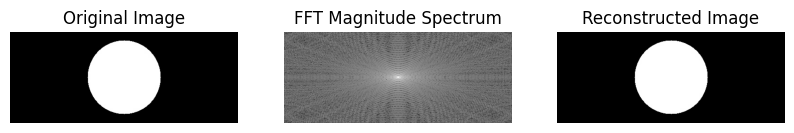

In [20]:

#  Apply 2D Fast Fourier Transform
f = np.fft.fft2(img)

#  Shift the zero-frequency component to the center
fshift = np.fft.fftshift(f)


# Reverse FFT (frequency → spatial)
f_ishift = np.fft.ifftshift(fshift)   
img_reconstructed = np.fft.ifft2(f_ishift)  
img_reconstructed = np.abs(img_reconstructed) 

magnitude_spectrum = np.log(np.abs(fshift) + 1)

diff = img - img_reconstructed
print(diff.sum())
print(img.sum()-img_reconstructed.sum())  
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FFT Magnitude Spectrum')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()
